In [7]:
import pandas as pd

# Read the CSV file
file = pd.read_csv("parks.csv")

# Drop specified columns
columns_to_drop = ['_id', 'id', 'maintenance_responsibility', 'image', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude']
file = file.drop(columns_to_drop, axis=1)

# Group by 'name' and 'neighborhood', summing the remaining columns
grouped_file = file.groupby(['name', 'neighborhood', 'type'], as_index=False).sum()
print(grouped_file)


                        name        neighborhood                   type
0             Able Long Park           Beechview                   Park
1    Albert Turk Graham Park    Crawford-Roberts                   Park
2                 Alcoa Park         North Shore                   Park
3          Allegheny Commons    Allegheny Center                   Park
4     Allegheny Landing Park         North Shore                   Park
..                       ...                 ...                    ...
204  Windermere Circle 1 & 2      Swisshelm Park  Traffic Island/Median
205             Winters Park   South Side Slopes                   Park
206           Woods Run Park  Marshall-Shadeland                   Park
207         Young Field Park  Marshall-Shadeland                   Park
208              Zulema Park     Central Oakland                   Park

[209 rows x 3 columns]


First, I read in the data and had it show only the name, neighborhood, and type. The reason I kept type was because the data counted traffic circles and mediums as a park. However, I want analyze actual walkable parks.

In [3]:
import pandas as pd

# Read the CSV file
file = pd.read_csv("parks.csv")

# Drop specified columns
columns_to_drop = ['_id', 'id', 'maintenance_responsibility', 'image', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude']
file = file.drop(columns_to_drop, axis=1)

# Group by 'name', 'neighborhood', and 'type', summing the remaining columns
grouped_file = file.groupby(['name', 'neighborhood', 'type'], as_index=False).sum()

# Filter out rows where the 'type' is not 'park'
parks_only = grouped_file[grouped_file['type'] == 'Park']

# Group by 'neighborhood' to count parks in each neighborhood
neighborhood_parks_count = parks_only.groupby('neighborhood')['name'].count().reset_index()
neighborhood_parks_count.columns = ['neighborhood', 'park_count']

# Sort neighborhoods by park count (from most to least parks)
sorted_neighborhoods = neighborhood_parks_count.sort_values(by='park_count', ascending=False)

print(sorted_neighborhoods)


         neighborhood  park_count
55  South Side Slopes           6
5           Beechview           6
43   Mount Washington           5
30          Hazelwood           5
64          Troy Hill           5
..                ...         ...
34      Homewood West           1
41        Middle Hill           1
42        Morningside           1
44      New Homestead           1
70            Windgap           1

[71 rows x 2 columns]


In [4]:
import pandas as pd

data = neighborhood_parks_count.sort_values(by='park_count', ascending=False).head(10)
print(data)



           neighborhood  park_count
55    South Side Slopes           6
5             Beechview           6
43     Mount Washington           5
30            Hazelwood           5
64            Troy Hill           5
40   Marshall-Shadeland           4
23              Elliott           4
22         East Liberty           4
52             Sheraden           4
38  Lower Lawrenceville           3


Next, I had it take the top ten, then sort by getting rid of anything in the 'type' colunn that wasn't listed as a 'park'. Then, I jad it sort the data by which neighborhoods had the most parks and put it at the top of the list.

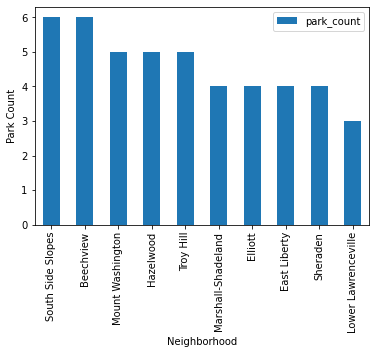

In [5]:
import matplotlib.pyplot as plt

# Assuming 'data' contains the DataFrame with 'neighborhood' and corresponding values for plotting
data.plot(kind='bar', x='neighborhood', y='park_count')
plt.xlabel('Neighborhood')
plt.ylabel('Park Count')
plt.show()


I made a graph to visually show which neighborhoods had the most parks. Clearly the South Side Slopes and Beechview have the most parks. In order to determine which of the two is better, we must take into account the other data and compare if it exvels in other aspects other than just how many parks it has.